In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Helper Function for Text Cleaning:

Implement a Helper Function as per Text Preprocessing Notebook and Complete the following pipeline.

# Build a Text Cleaning Pipeline

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Ensure necessary resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def text_cleaning_pipeline(dataset, rule="lemmatize"):

    # Convert the input to lowercase
    data = dataset.lower()

    # Remove URLs
    data = re.sub(r"http\S+|www\S+|https\S+", '', data)

    # Remove emojis
    data = re.sub(r'[^\w\s,]', '', data.encode('ascii', 'ignore').decode('ascii'))

    # Remove all other unwanted characters (e.g., special chars and digits)
    data = re.sub(r'[^a-z\s]', '', data)

    # Create tokens
    tokens = data.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Apply lemmatization or stemming
    if rule == "lemmatize":
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    elif rule == "stem":
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    else:
        print("Pick between lemmatize or stem")

    return " ".join(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### 📝 Instructions: Trump Tweet Sentiment Classification

1. **Load the Dataset**  
   Load the dataset named `"trump_tweet_sentiment_analysis.csv"` using `pandas`. Ensure the dataset contains at least two columns: `"text"` and `"label"`.

2. **Text Cleaning and Tokenization**  
   Apply a text preprocessing pipeline to the `"text"` column. This should include:
   - Lowercasing the text  
   - Removing URLs, mentions, punctuation, and special characters  
   - Removing stopwords  
   - Tokenization (optional: stemming or lemmatization)
   - "Complete the above function"

3. **Train-Test Split**  
   Split the cleaned and tokenized dataset into **training** and **testing** sets using `train_test_split` from `sklearn.model_selection`.

4. **TF-IDF Vectorization**  
   Import and use the `TfidfVectorizer` from `sklearn.feature_extraction.text` to transform the training and testing texts into numerical feature vectors.

5. **Model Training and Evaluation**  
   Import **Logistic Regression** (or any machine learning model of your choice) from `sklearn.linear_model`. Train it on the TF-IDF-embedded training data, then evaluate it using the test set.  
   - Print the **classification report** using `classification_report` from `sklearn.metrics`.


# Text Classification using Machine Learning Models


1) Load the Dataset


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/trum_tweet_sentiment_analysis.csv")

print(df.head())


                                                text  Sentiment
0  RT @JohnLeguizamo: #trump not draining swamp b...          0
1  ICYMI: Hackers Rig FM Radio Stations To Play A...          0
2  Trump protests: LGBTQ rally in New York https:...          1
3  "Hi I'm Piers Morgan. David Beckham is awful b...          0
4  RT @GlennFranco68: Tech Firm Suing BuzzFeed fo...          0


2) Text Cleaning and Tokenization

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def text_cleaning_pipeline(text, rule="lemmatize"):
    # Lowercase
    text = text.lower()

    # Remove URLs and mentions
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+", '', text)

    # Remove emojis and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenization
    tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization or stemming
    if rule == "lemmatize":
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    elif rule == "stem":
        from nltk.stem import PorterStemmer
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    else:
        print("Invalid rule: Choose either 'lemmatize' or 'stem'")

    return " ".join(tokens)

# Apply cleaning to the text column
df['clean_text'] = df['text'].apply(lambda x: text_cleaning_pipeline(x, rule="lemmatize"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


3) Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Feature and label selection
X = df['clean_text']
y = df['Sentiment']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4) TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize and fit TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


5) Model Training and Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95    248563
           1       0.91      0.87      0.89    121462

    accuracy                           0.93    370025
   macro avg       0.92      0.91      0.92    370025
weighted avg       0.93      0.93      0.93    370025



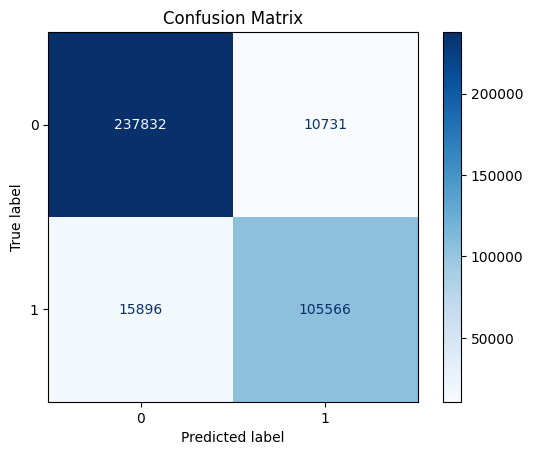

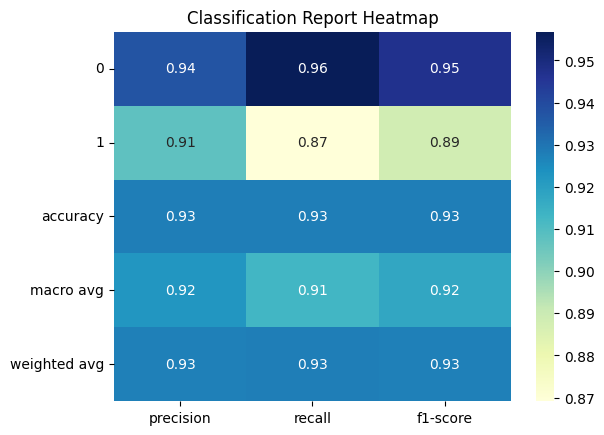

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred = model.predict(X_test_tfidf)

# === Classification Report (Text Output) ===
print("Classification Report:")
print(classification_report(y_test, y_pred))

# === Confusion Matrix (Graphical Output) ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# === Heatmap of Classification Report ===
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()
